## The sinusoidal model

In [ ]:
# Hit the live python code button and firstly run this cell to import the necessary packages we'll need.
%pip install ipympl
import numpy as np 
from matplotlib import pyplot as plt
from ipywidgets import * # interactive plots
import IPython
from IPython.display import Audio, display
%matplotlib ipympl


### A mathematical representation of sound

The sinusoidal model is mathematically defined as

$\begin{equation}
y(t) = A\cos(2 \pi f_{o}t +\theta)
\end{equation}$

where $A$ is the amplitude, $f_{o}$ is the fundamental frequency (Hz), $t$ is the time (seconds), and $\theta$ is a phase offset (radians). This is one of the most fundamental and useful models in audio signal processing and is the building block of many other types of sounds. 

Let's have a look at how the parameters affect the look and sound of this signal. Running the following cell brings up a number of sliders which correspond to the parameters, $A$, $f_{o}$, and $\theta$. Play around with these to observe how the waveform changes visually and listen to the resulting sounds!


Move the slider to see how the parameters change the sinusoid and listen to the result


interactive(children=(FloatSlider(value=1.0, description='A', max=1.0, min=0.1), IntSlider(value=100, descript…

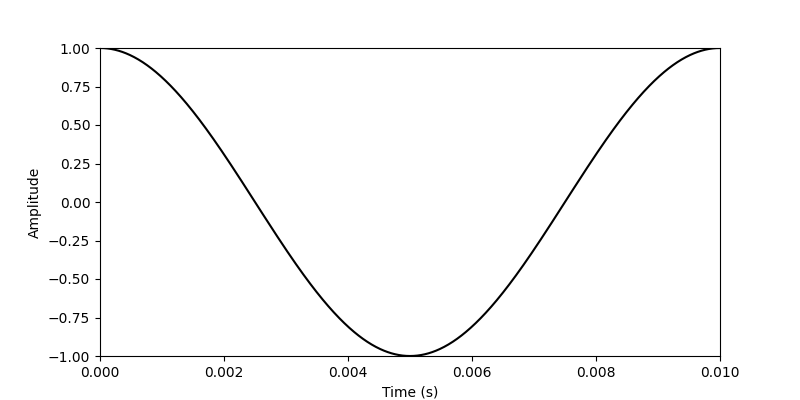

In [ ]:
# Setting up the plots
fig, axes = plt.subplots(figsize=(8,4))

dt = 0.00001 # time spacing
t = np.arange(0,2,dt) # range of times to plot on x-axis
line, = axes.plot([], [], 'k')
axes.set_ylabel('Amplitude', color='k')
axes.set_xlabel('Time (s)', color='k')
axes.set_xlim([0, 0.01])
axes.set_ylim([-1, 1])

# Create the interactive plot
def update_sinusoid(A = 0.5, fo=100, theta = 0):
    
    y = A*np.cos(2*np.pi*fo*t + theta)

    line.set_data(t, y)
    fig.canvas.draw_idle()
    IPython.display.display(Audio(y.T, rate=1/dt,normalize=False))

print('Move the slider to see how the parameters change the sinusoid and listen to the result')
interact(update_sinusoid, A = (0.1,1,0.1), fo = (30,2000,10), theta = (-4*np.pi,4*np.pi,np.pi/16));
plt.show()

### A glimpse into modulation

We can do some basic [modulation](https://en.wikipedia.org/wiki/Frequency_modulation) of the sinusoid by making the phase offset some function of time. In the following, I've made the phase offset a sinusoidal signal with some frequency $f_2$. This is simply one option to make more complex sounds from the basic sinusoidal model, but you have complete liberty to modify the parts of this code as you wish to try different functions for the phase offset, introduce additional parameters, whatever you like really, and then see and hear the immediate impact these modifications. 

Move the slider to see how the parameters change the cosine and listen to the result


interactive(children=(FloatSlider(value=0.5, description='A', max=1.0, min=0.1), IntSlider(value=100, descript…

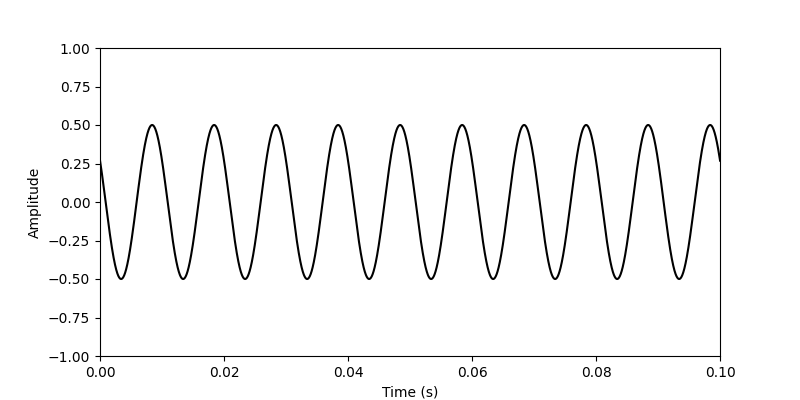

In [ ]:
# Setting up the plots - some wildness with phase
fig, axes = plt.subplots(figsize=(8,4))

dt = 0.00001            # time spacing
t = np.arange(0,2,dt)   # range of times to plot on x-axis
line, = axes.plot([], [], 'k')
axes.set_ylabel('Amplitude', color='k')
axes.set_xlabel('Time (s)', color='k')
axes.set_xlim([0, 0.1])
axes.set_ylim([-1, 1])

# Create the interactive plot
def update_sinusoid(A = 0.5, fo=100, f2 = 0.1):
    
    theta = np.cos(2*np.pi*f2*t)        # !!! Change this to any function of f2 and time that you like !!!
    y = A*np.cos(2*np.pi*fo*t + theta)

    line.set_data(t, y)
    fig.canvas.draw_idle()
    IPython.display.display(Audio(y.T, rate=1/dt,normalize=False))

print('Move the slider to see how the parameters change the cosine and listen to the result')
interact(update_sinusoid, A = (0.1,1,0.1), fo = (30,2000,10), f2 = (0.1,100,0.1))
plt.show()
